# Ensemble Learning and Random Forests

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ensemble Learning

A group of predictors is often better than one very good predictor (wisdom of the crowd).
Ensemble learning uses this concept to do classification and regression.

## Voting Classifiers

Each classifier states their class and the most frequent class (class with more votes) is chosen as the Ensemble Classification label.

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42)),
])
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
for name, classifier in voting_classifier.named_estimators_.items():
    print(name, '=', classifier.score(X_test, y_test))
print("Ensemble =", voting_classifier.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896
Ensemble = 0.912


### Soft Voting

If the algorithms inside the ensemble can predict the probability of each class we can change the rules of the voting. Soft Voting promotes a voting scenario where each decision is accompanied by the grade of confidence it has.

In short terms classifiers that have high degree of confidence into their classifications will have a more significant vote.

In [5]:
voting_classifier.voting = 'soft'
voting_classifier.named_estimators['svc'].probability = True
voting_classifier.fit(X_train, y_train)
voting_classifier.score(X_test, y_test)

0.92

## Bagging and Pasting

Instead of feeding each algorithm in an ensemble with all the training data we can feed it a random subset to each algorithm.

- If this each sample is exclusive to one subset, we are in the presence of **Pasting**;
- If a sample may appear in several subsets, we are in the presence of **Bagging**.

Example: Imagine we choose 10 cards from a deck.
- Pasting occurs when we take all 10 cards;
- Bagging occurs when we take 1 card and put it back in the deck ten times.

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, random_state=42, n_jobs=-1)
bag_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [7]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(["#fafab0", "#9898ff"])

def draw_decision_boundary(classifier, X, y, ax0, ax1, ax2, ax3):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'go')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'r^')

    x1s, x2s = np.meshgrid(np.linspace(ax0, ax1, 100), np.linspace(ax2, ax3, 100))
    xs_all = np.c_[x1s.ravel(), x2s.ravel()]
    y_predicted = classifier.predict(xs_all).reshape(x1s.shape)

    plt.contourf(x1s, x2s, y_predicted, cmap=color_map)
    plt.contour(x1s, x2s, y_predicted, cmap="Greys", alpha=0.8)

Text(0, 0.5, 'x2')

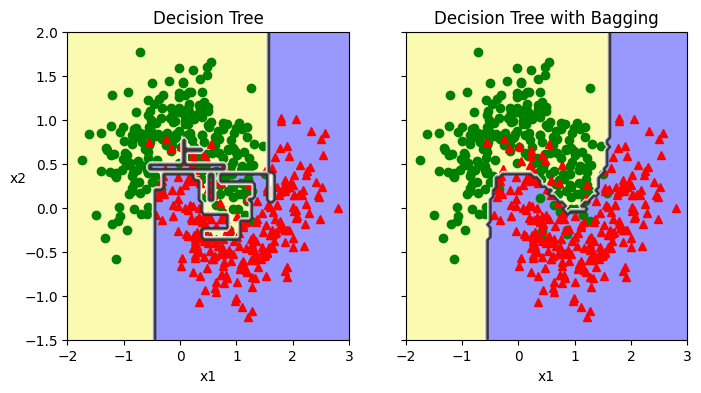

In [8]:
figure, (ax0, _) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4))

draw_decision_boundary(bag_classifier, X, y, -2, 3, -1.5, 2.0)
plt.title("Decision Tree with Bagging")
plt.xlabel('x1')

plt.sca(ax0)
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
draw_decision_boundary(tree_classifier, X, y, -2, 3, -1.5, 2.0)
plt.title("Decision Tree")
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)

## Out-of-Bag Evaluation

We can use the samples not present in the bagged/pasted dataset to have a general idea of the accuracy

In [9]:
bag_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score=True, n_jobs=-1, random_state=42)
bag_classifier.fit(X_train, y_train)
bag_classifier.oob_score_ 

0.896

In [10]:
from sklearn.metrics import accuracy_score

y_predicted = bag_classifier.predict(X_test)
accuracy_score(y_test, y_predicted)

0.92

## Random Patches and Random Subspaces

In addition to sampling (bagging/pasting) datasets we can also sample the input features
- If we sample both dataset and input features we are using the **Random Patches Method**
- If we only sample the input features we are using **Random Subspaces Method**

# Random Forests

Random Forest use, by default, the Random Patches Method

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
random_classifier.fit(X_train, y_train)
random_classifier.score(X_test, y_test)

0.912

## Feature Importance

In [13]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

random_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
random_classifier.fit(iris.data, iris.target)

for score, name in zip(random_classifier.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


c:\Users\William\Desktop\repository\hands_on_machine_learning\.venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


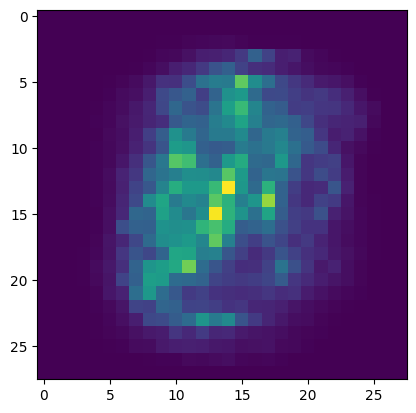

In [15]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

random_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_classifier.fit(X_mnist, y_mnist)

heatmap = random_classifier.feature_importances_.reshape(28,28)
plt.imshow(heatmap)

## Boosting

One of the problems of ensembles is that every predictor may fall in the same error(s). To avoid this, boosting trains classifier one by one but, in each iteration, it gives more enphasis to the missclassified samples using weight vectors.

### AdaBoosting

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5, random_state=42)
ada_classifier.fit(X_train, y_train)
ada_classifier.score(X_test, y_test)

0.904

### Gradient Boosting

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # y = 3x² + Gaussian noise
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [22]:
y2 = y - tree_reg1.predict(X) 
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
y3 = y2 - tree_reg2.predict(X) 
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

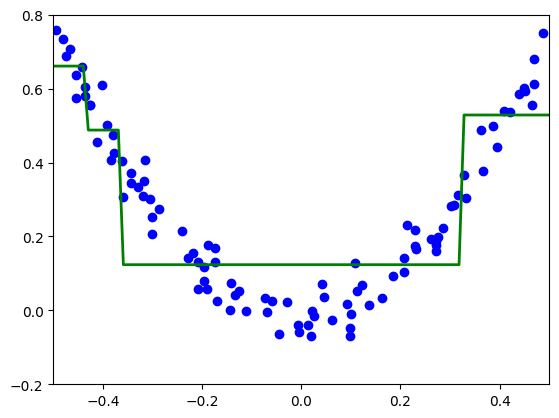

In [36]:
def draw_residuals(classifier, X, y, ax0, ax1, marker='k+'):
    xs = np.linspace(ax0, ax1, 100).reshape(-1, 1)
    ys = classifier.predict(xs)
    plt.plot(X, y, marker, label='')
    plt.plot(xs, ys, 'g', linewidth=2)
    plt.axis([ax0, ax1, -0.2, 0.8])

draw_residuals(tree_reg1, X, y, -0.5, 0.5, 'bo')

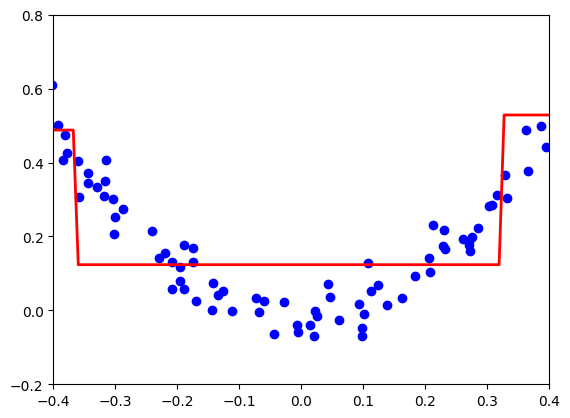

In [43]:
def draw_ensemble_predictions(classifiers, X, y, ax0, ax1, marker='r-'):
    xs = np.linspace(ax0, ax1, 100).reshape(-1, 1)
    ys = sum(classifier.predict(xs) for classifier in classifiers)
    plt.plot(X, y, 'bo')
    plt.plot(xs, ys, marker, linewidth=2)
    plt.axis([ax0, ax1, -0.2, 0.8])


draw_ensemble_predictions([tree_reg1], X, y, -0.4, 0.4)

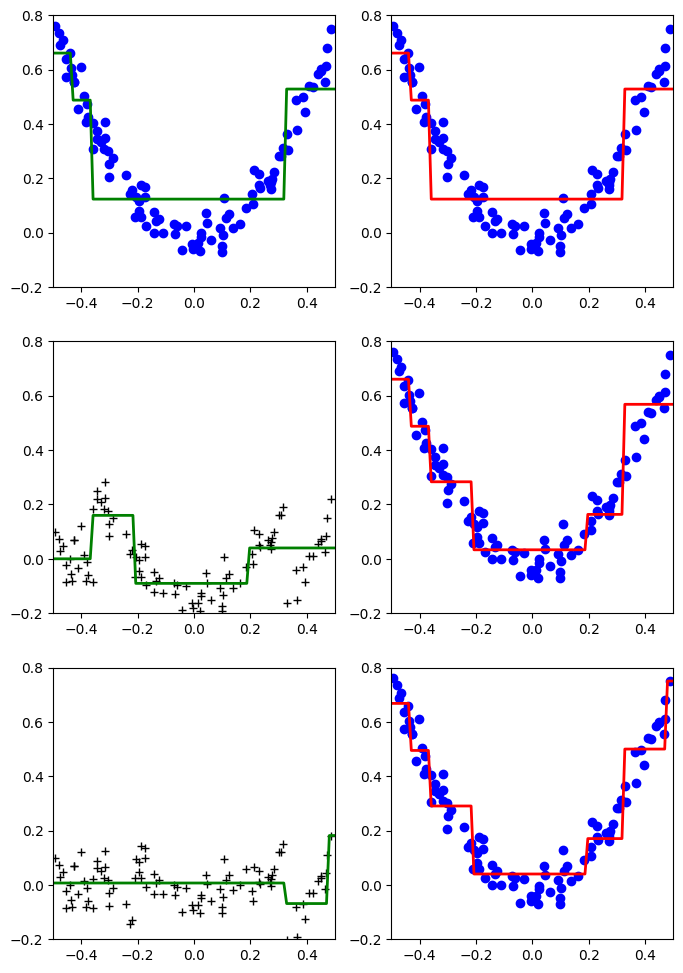

In [48]:
figure, ((ax0, ax1),(ax2, ax3), (ax4, _)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))

draw_ensemble_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, -0.5, 0.5)
plt.sca(ax0)
draw_residuals(tree_reg1, X, y, -0.5, 0.5, 'bo')
plt.sca(ax1)
draw_ensemble_predictions([tree_reg1], X, y, -0.5, 0.5)
plt.sca(ax2)
draw_residuals(tree_reg2, X, y2, -0.5, 0.5)
plt.sca(ax3)
draw_ensemble_predictions([tree_reg1, tree_reg2], X, y, -0.5, 0.5)
plt.sca(ax4)
draw_residuals(tree_reg3, X, y3, -0.5, 0.5)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

## Early Stop

In [51]:
gbrt_best = GradientBoostingRegressor(
 max_depth=2, learning_rate=0.05, n_estimators=500,
 n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)
gbrt_best.n_estimators_

92

# HistGradient Booster

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing_labels = train_set["median_house_value"]
housing = train_set.drop("median_house_value", axis=1)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder 

hgb_reg = make_pipeline(
    make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]),
                            remainder="passthrough"),
    HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)
hgb_reg.fit(housing, housing_labels)
hgb_reg.score(housing, housing_labels)

0.8712633283445104